# **Support Vector Machine (SVM) Algorithm**

## **1. Introduction**

The **Support Vector Machine (SVM)** is a powerful supervised learning algorithm used for both classification and regression tasks. It is particularly effective for high-dimensional datasets and when the classes are well-separated.

- **Key Idea**: Find the optimal **hyperplane** that separates data into different classes with the maximum margin.
- **Applications**: Image classification, text categorization, bioinformatics, and handwriting recognition.

![Application of SVM.png](../images/svm_applications.png)

##
---

## **2. Key Mathematical Concepts**

### **2.1 Hyperplane**

A **hyperplane** is a decision boundary that separates different classes. For \(n\)-dimensional data, the hyperplane is \(n-1\)-dimensional.

For two-dimensional data:
$$
w \cdot x + b = 0
$$

Where:
- \(w\): Weight vector (normal to the hyperplane).
- \(x\): Feature vector.
- \(b\): Bias term.



![HyperPlanes.png](../images/hyperplanes.png)

### **2.2 Maximum Margin**

SVM aims to **maximize the margin**, which is the distance between the hyperplane and the nearest data points (support vectors). 

The margin is defined as:
$$
\text{Margin} = \frac{2}{\|w\|}
$$


![SVM.png](../images/hyperplanes_2.png)

### **2.3 Optimization Problem**

To maximize the margin, SVM minimizes:

$$
\frac{1}{2} \|w\|^2
$$

Subject to:

$$
y_i (w \cdot x_i + b) \geq 1, \quad \forall i
$$

Where:
- \($y_i$\): Class label (\(+1\) or \(-1\)).
- \($x_i$\): Feature vector of the \($i^{th}$\) sample.


### **2.4 Kernel Trick**

For `non-linearly separable data`, SVM uses the **kernel trick** to project data into a `higher-dimensional` space where a linear hyperplane can separate the classes.

#### Common Kernel Functions:

1. **Linear Kernel**:
   $$
   K(x_i, x_j) = x_i \cdot x_j
   $$

2. **Polynomial Kernel**:
   $$
   K(x_i, x_j) = (\gamma x_i \cdot x_j + r)^d
   $$

3. **Radial Basis Function (RBF) Kernel**:
   $$
   K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2)
   $$

4. **Sigmoid Kernel**:
   $$
   K(x_i, x_j) = \tanh(\gamma x_i \cdot x_j + r)
   $$

##
---

## **3. Types of SVM**

1. **Hard Margin SVM**: Assumes data is linearly separable without errors.
2. **Soft Margin SVM**: Allows some misclassification by introducing a penalty term.

Objective function for Soft Margin SVM:

$$
\min \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i
$$

Subject to:

$$
y_i (w \cdot x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
$$

Where:
- \(C\): Regularization parameter.
- \($\xi_i$\): Slack variables for misclassification.


##
---

## **4. Implementation**

### **4.1 Linear SVM Example**

**Dataset**: Synthetic Data

In [3]:
# Import Libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Generate Synthetic Dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Linear SVM
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X_train, y_train)

# Predict and Evaluate
y_pred = linear_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Linear SVM Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Linear SVM Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Plot Decision Boundary**

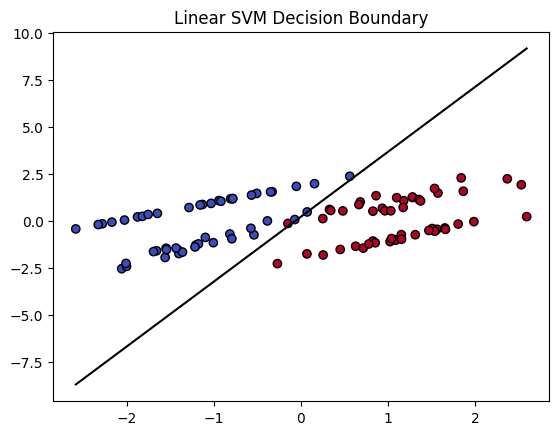

In [4]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt

# Plotting the Decision Boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
w = linear_svm.coef_[0]
b = linear_svm.intercept_[0]

# Calculate decision boundary
x_points = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
decision_boundary = -(w[0] / w[1]) * x_points - b / w[1]

plt.plot(x_points, decision_boundary, color='black')
plt.title("Linear SVM Decision Boundary")
plt.show()

###
---

### **4.2 Non-Linear SVM Example**

**Dataset**: Synthetic Data (Non-Linear)

```python
# Import Libraries
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Generate Non-Linear Dataset
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train RBF Kernel SVM
rbf_svm = SVC(kernel='rbf', C=1.0, gamma=0.5)
rbf_svm.fit(X_train, y_train)

# Predict and Evaluate
y_pred = rbf_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"RBF SVM Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
```

**Plot Decision Boundary**
```python
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt

# Plotting the Decision Boundary for RBF Kernel
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = rbf_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 50), cmap='coolwarm', alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("RBF Kernel SVM Decision Boundary")
plt.show()
```

##
---

## **5. Advantages and Disadvantages**

### Advantages
- **Effective in High Dimensions**: Handles datasets with many features effectively.

- **Robust to Overfitting**: Especially with large margins.

- **Versatile**: Supports linear and non-linear classification via kernel trick.

### Disadvantages
- **Computationally Expensive**: Training is slow for large datasets.

- **Difficult to Interpret**: Non-linear SVMs are hard to interpret compared to decision trees.

- **Requires Careful Tuning**: Parameters like C and $\gamma$ significantly impact performance.

##
---

## **6. Conclusion**

- SVM is a powerful algorithm for both linear and non-linear classification tasks.

- It is effective for high-dimensional data but computationally expensive.

- Careful parameter tuning (e.g., CCC, kernel type) is essential for optimal performance.